# Pymaceuticals

## Analysis
 * Observed Trend 1
 * Observed Trend 2
 * Observed Trend 3

In [29]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [30]:
# Read CSV
clinical_data = pd.read_csv("Resources/clinicaltrial_data.csv")
drug_data = pd.read_csv("Resources/mouse_drug_data.csv")
clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [31]:
# Merge CSV files into single Data Frame
clinical_file = pd.merge(clinical_data, drug_data, how='outer', on='Mouse ID')
clinical_file.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [32]:
# Output Test
test_count = clinical_file["Drug"].count()
test_count

1906

In [33]:
# Basic Calculations
drug_grp = clinical_file.groupby(['Drug','Timepoint'])
tumor_mean_time_pt = drug_grp.mean()
tumor_sem_time_pt = drug_grp.sem()

In [34]:
tumor_mean_time_pt

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174
          25                  39.939528          0.818182
          30                  38.769339          1.090909
          35                  37.816839          1.181818
          40                  36.958001          1.380952
          45                  36.236114          1.476190
Ceftamin  0                   45.000000          0.000000
          5                   46.503051          0.380952
          10                  48.285125          0.600000
          15                  50.094055          0.789474
          20                  52.157049          1.111111
          25                  54.287674          1.500000
          30                  56.769517          1.937500
          35                  58.827548          2.071429
          40                  61.467895          2.357143
          45                  64.132421          2.692308
Infubinol 0                   45.000000          0.000000
          5                   47.062001          0.280000
          10                  49.403909          0.666667
          15                  51.296397          0.904762
          20                  53.197691          1.050000
          25                  55.715252          1.277778
          30                  58.299397          1.588235
          35                  60.742461          1.666667
          40                  63.162824          2.100000
          45                  65.755562          2.111111
...                                 ...               ...
Ramicane  0                   45.000000          0.000000
          5                   43.944859          0.120000
          10                  42.531957          0.250000
          15                  41.495061          0.333333
          20                  40.238325          0.347826
          25                  38.974300          0.652174
          30                  38.703137          0.782609
          35                  37.451996          0.952381
          40                  36.574081          1.100000
          45                  34.955595          1.250000
Stelasyn  0                   45.000000          0.000000
          5                   47.527452          0.240000
          10                  49.463844          0.478261
          15                  51.529409          0.782609
          20                  54.067395          0.952381
          25                  56.166123          1.157895
          30                  59.826738          1.388889
          35                  62.440699          1.562500
          40                  65.356386          1.583333
          45                  68.438310          1.727273
Zoniferol 0                   45.000000          0.000000
          5                   46.851818          0.166667
          10                  48.689881          0.500000
          15                  50.779059          0.809524
          20                  53.170334          1.294118
          25                  55.432935          1.687500
          30                  57.713531          1.933333
          35                  60.089372          2.285714
          40                  62.916692          2.785714
          45                  65.960888          3.071429

[100 rows x 2 columns]

In [35]:
# Delete the "Metastatic Sites" column
del tumor_mean_time_pt['Metastatic Sites']
del tumor_sem_time_pt['Metastatic Sites']

tumor_mean_pivot = tumor_mean_time_pt.unstack(level=0)
tumor_sem_pivot = tumor_sem_time_pt.unstack(level=0)

In [48]:
tumor_mean_pivot

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

In [43]:
tumor_mean_pivot["Tumor Volume (mm3)"]["Capomulin"]

Timepoint
0     45.000000
5     44.266086
10    43.084291
15    42.064317
20    40.716325
25    39.939528
30    38.769339
35    37.816839
40    36.958001
45    36.236114
Name: Capomulin, dtype: float64

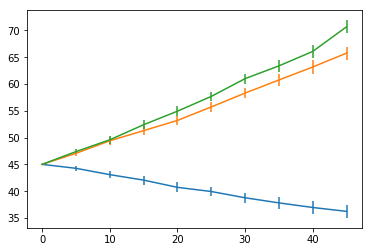

In [49]:
plt.errorbar(tumor_mean_pivot.index, tumor_mean_pivot["Tumor Volume (mm3)"]["Capomulin"], yerr=tumor_sem_pivot["Tumor Volume (mm3)"]["Capomulin"])
plt.errorbar(tumor_mean_pivot.index, tumor_mean_pivot["Tumor Volume (mm3)"]["Infubinol"], yerr=tumor_sem_pivot["Tumor Volume (mm3)"]["Capomulin"])

plt.errorbar(tumor_mean_pivot.index, tumor_mean_pivot["Tumor Volume (mm3)"]["Ketapril"], yerr=tumor_sem_pivot["Tumor Volume (mm3)"]["Capomulin"])

plt.show()
